<a href="https://colab.research.google.com/github/vandana-10/DataAnalyst_Intern_Tasks/blob/main/SQLite_Python_Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing SQLite and Establishing Connection with Database**

In [ ]:
import sqlite3

# Connection is used to Connect database
Connection = sqlite3.connect('sales_data.db')

# Cursor is used to Interact with database through sql Commands
# This will allows to Create , Update or Modify with the Tables in Database
Cursor = Connection.cursor()

**Created a Sales Table by using SQL Query in SQLite**

In [ ]:
command1 = """CREATE TABLE IF NOT EXISTS
                    Sales(Store_id INTEGER PRIMARYKEY ,Product TEXT , Price INTEGER , Units_sold INTEGER , Quantity INTEGER)"""
Cursor.execute(command1)

**Assigning Values into the Column**

In [ ]:
Cursor.execute('INSERT INTO Sales VALUES(1, "Apple",  20,  10, 100)')
Cursor.execute('INSERT INTO Sales VALUES(2, "Banana", 35,   11, 40)')
Cursor.execute('INSERT INTO Sales VALUES(3, "Orange", 15, 20, 90)')
Cursor.execute('INSERT INTO Sales VALUES(4, "Kiwi",  44,  15, 50)')
Cursor.execute('INSERT INTO Sales VALUES(5, "Mango", 55,  35, 120)')

**After Inserting the Values , I executed the Table**

In [ ]:
Cursor.execute("SELECT * FROM sales")
results = Cursor.fetchall()
print(results)

[(1, 'Apple', 20, 10, 100), (2, 'Banana', 35, 11, 40), (3, 'Orange', 15, 20, 90), (4, 'Kiwi', 44, 15, 50), (5, 'Mango', 55, 35, 120)]


**Running Some SQL Queries to Understand the Data and SQLite**

In [ ]:
Cursor.execute('SELECT Product, MIN(Quantity) FROM Sales')
results = Cursor.fetchall()
print(results)

[('Banana', 40)]


In [ ]:
Cursor.execute('SELECT Product FROM Sales WHERE Store_id = 3')
results = Cursor.fetchall()
print(results)

[('Orange',)]


In [ ]:
Cursor.execute('UPDATE Sales SET Quantity = 55 WHERE Store_id = 4')
results = Cursor.fetchall()
print(results)

[]


In [ ]:
Cursor.execute('SELECT * FROM Sales ')
results = Cursor.fetchall()
print(results)


[(1, 'Apple', 20, 10, 100), (2, 'Banana', 35, 11, 40), (3, 'Orange', 15, 20, 90), (4, 'Kiwi', 44, 15, 55), (5, 'Mango', 55, 35, 120)]


**Printing the Result in a Table form**

In [ ]:
for row in results:
  print(row)

(1, 'Apple', 20, 10, 100)
(2, 'Banana', 35, 11, 40)
(3, 'Orange', 15, 20, 90)
(4, 'Kiwi', 44, 15, 55)
(5, 'Mango', 55, 35, 120)


**Created a Revenue Column for Products**

In [ ]:
# Revenue Column is Created by using Aggregate and GROUPBY functiona
Cursor.execute('SELECT Product , SUM(Price*Units_sold) AS Total_sales FROM Sales GROUP BY Product')
results=Cursor.fetchall()
print(results)

[('Apple', 200), ('Banana', 385), ('Kiwi', 660), ('Mango', 1925), ('Orange', 300)]


**Altering , Modifying and Updating the Tables by running SQL Statements**

In [ ]:
# Adding New Column to Existing Table in SQLite

Cursor.execute('ALTER TABLE Sales ADD COLUMN Revenue FLOAT')
results=Cursor.fetchall()
print(results)

[]


In [ ]:
# Updating a table in SQLite

Cursor.execute('UPDATE  Sales SET Revenue = Price * Units_sold')
results=Cursor.fetchall()
print(results)

[]


In [ ]:
Cursor.execute(' SELECT * FROM Sales  ')
results=Cursor.fetchall()
print(results)

[(1, 'Apple', 20, 10, 100, 200.0), (2, 'Banana', 35, 11, 40, 385.0), (3, 'Orange', 15, 20, 90, 300.0), (4, 'Kiwi', 44, 15, 55, 660.0), (5, 'Mango', 55, 35, 120, 1925.0)]


In [ ]:
# Using Aggregate Function in SQLite to get Most sold Product

Cursor.execute('SELECT Product, MAX(Revenue) AS More_Sales FROM Sales')
results=Cursor.fetchall()
print(results)

[('Mango', 1925.0)]


In [ ]:
# Dropping the Table if not necessary
Cursor.execute("DROP TABLE IF EXISTS Sales")

# Commit and close
Connection.commit()
Connection.close()

# Importing SQL Database into Pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Writing a SQL query
query = ('SELECT * FROM Sales')

In [ ]:
# Connecting SQLite Query with Pandas

df = pd.read_sql_query(query,Connection)
df

,Store_id,Product,Price,Units_sold,Quantity,Revenue
0,1,Apple,20,10,100,200.0
1,2,Banana,35,11,40,385.0
2,3,Orange,15,20,90,300.0
3,4,Kiwi,44,15,55,660.0
4,5,Mango,55,35,120,1925.0


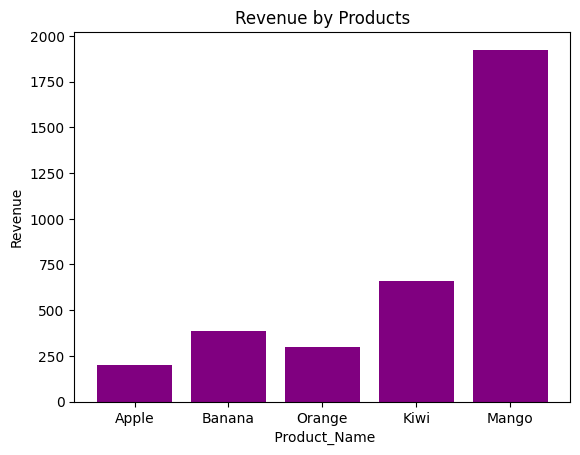

In [ ]:
# Created a Bar Plot using SQLite Query and Pandas

plt.bar(df['Product'] , df['Revenue'] , color = 'purple')
plt.xlabel(" Product_Name")
plt.ylabel('Revenue')
plt.title("Revenue by Products")
plt.show()

<Axes: xlabel='Price', ylabel='Units_sold'>

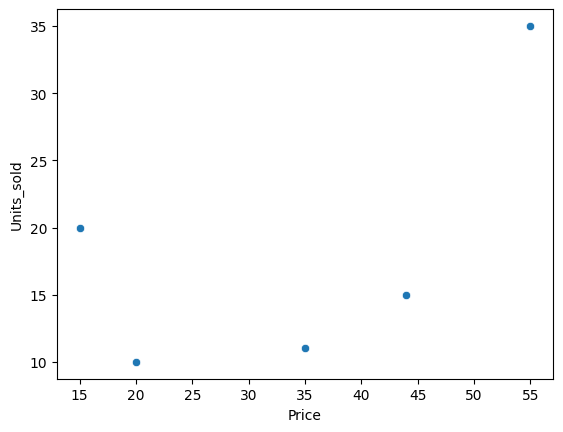

In [ ]:
sns.scatterplot(data = df , x = 'Price', y='Units_sold')